In [1]:
import xarray as xr
import proplot as plot

In [2]:
path = '/gpfsscratch/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/TEST/amip/Amip-144x142x79-zoomx2-himalaya-test-oz-ae-strat/ATM/Output/DA/'

In [3]:
ds = xr.open_dataset(path+'Amip-144x142x79-zoomx2-himalaya-test-oz-ae-strat_19800101_19800101_1D_histday.nc')
ds

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, presnivs: 79, time_counter: 1)
Coordinates:
  * lat                   (lat) float32 90.0 88.50914 ... -88.49235 -90.0
  * lon                   (lon) float32 -178.43634 -175.47523 ... 178.61938
  * presnivs              (presnivs) float32 101202.11 100942.43 ... 1.4834349
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 1980-01-01T12:00:00
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    phis                  (time_counter, lat, lon) float32 ...
    aire                  (lat, lon) float32 ...
    contfracATM           (lat, lon) float32 ...
    contfracOR            (time_counter, lat, lon) float32 ...
    flat                  (time_counter, lat, lon) float32 ...
    slp       

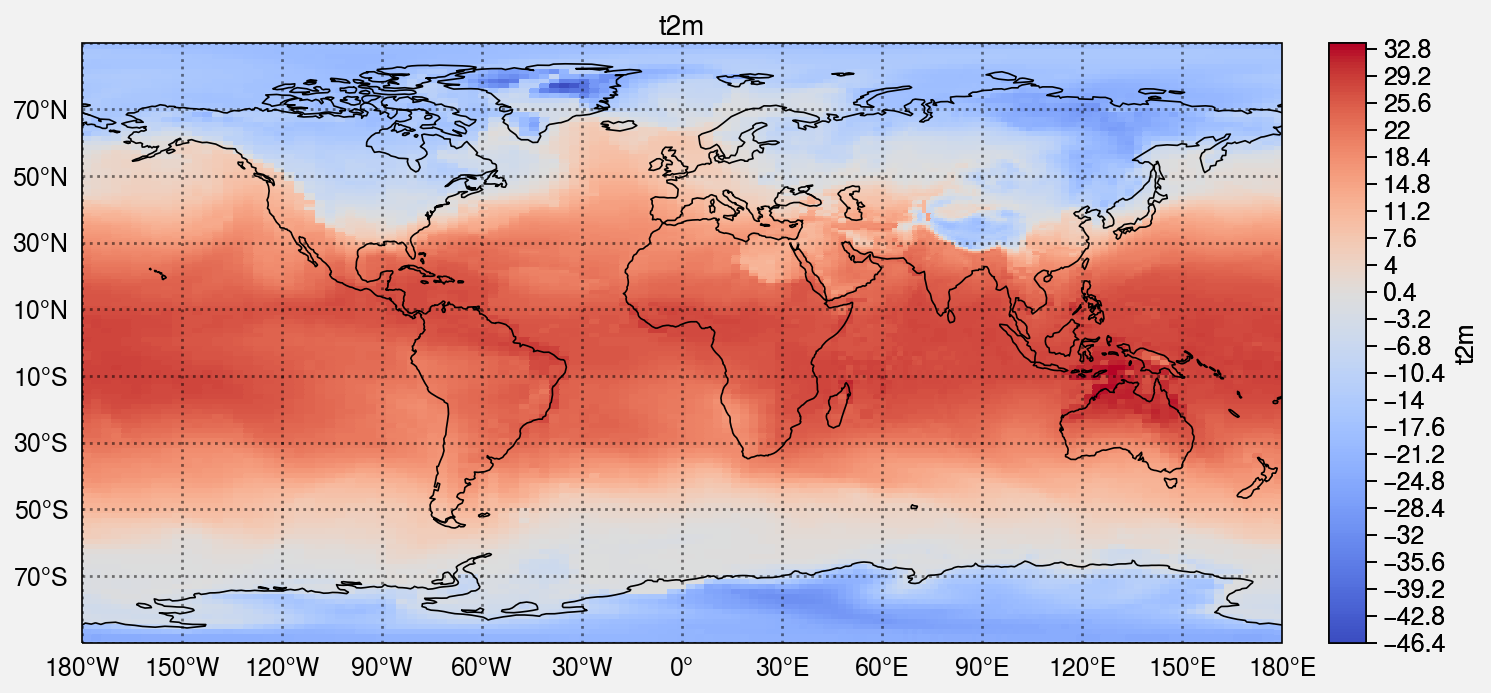

In [5]:
%matplotlib inline
f, axs = plot.subplots(proj='cyl', axwidth=6)

axs.format(coast=True, labels=True)

axs.pcolormesh(ds.t2m[0]-273.15, cmap='coolwarm', norm='midpoint', colorbar='r', globe=True, levels=256)

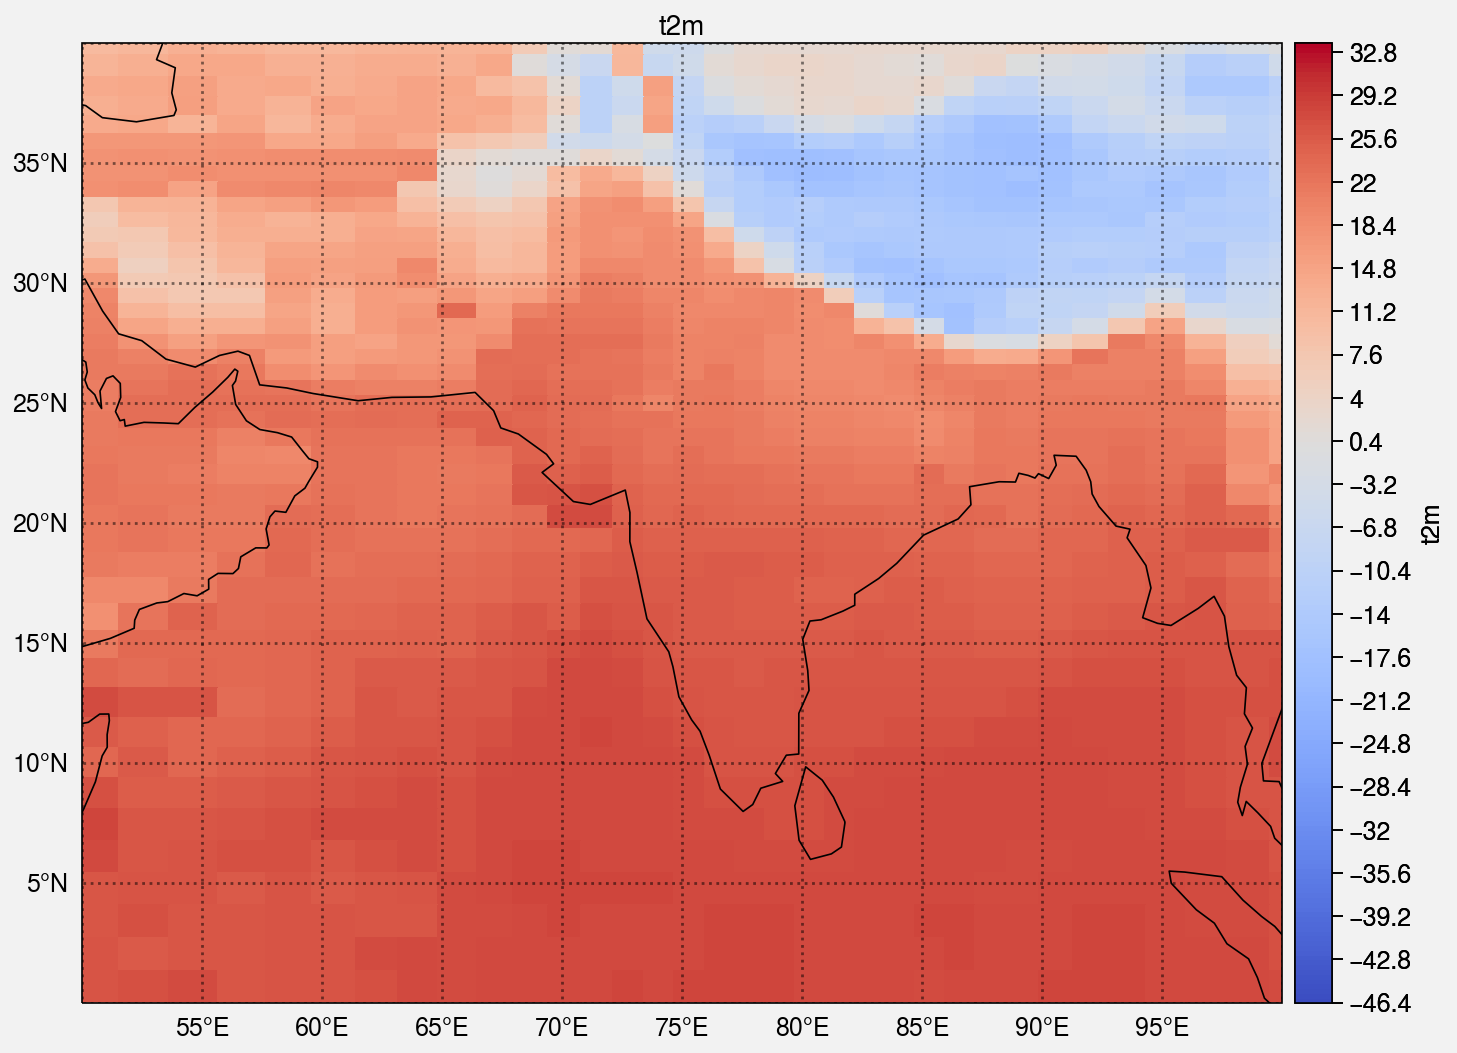

In [6]:
%matplotlib inline
f, axs = plot.subplots(proj='cyl', axwidth=6)

axs.format(coast=True, labels=True, lonlim=(50,100), latlim=(0,40), lonlines=5, latlines=5)

axs.pcolormesh(ds.t2m[0]-273.15, cmap='coolwarm', norm='midpoint', colorbar='r', globe=True, levels=256)

## Difference without forcing

In [13]:
path = '/gpfsscratch/rech/goe/ufz23bm/IGCM_OUT/LMDZOR/TEST/amip/Amip-144x142x79-zoomx2-himalaya-test/ATM/Output/DA/'

temp_without_forcing = xr.open_dataset(path+'Amip-144x142x79-zoomx2-himalaya-test_19800101_19800101_1D_histday.nc').t2m[0]
with xr.set_options(keep_attrs=True):
    temp_without_forcing = temp_without_forcing-273.15
    temp_without_forcing.attrs['units'] = '°C'
temp_without_forcing

<xarray.DataArray 't2m' (lat: 143, lon: 144)>
array([[-17.64563  , -17.64563  , -17.64563  , ..., -17.64563  ,
        -17.64563  , -17.64563  ],
       [-17.889786 , -17.996078 , -18.100754 , ..., -17.566788 ,
        -17.682495 , -17.776398 ],
       [-15.734741 , -15.834564 , -15.937805 , ..., -15.486267 ,
        -15.5737915, -15.643219 ],
       ...,
       [-22.299713 , -21.650284 , -20.944199 , ..., -23.285751 ,
        -22.99884  , -22.75357  ],
       [-24.115387 , -24.457062 , -24.258713 , ..., -24.1622   ,
        -24.455017 , -24.312912 ],
       [-22.41623  , -22.41623  , -22.41623  , ..., -22.41623  ,
        -22.41623  , -22.41623  ]], dtype=float32)
Coordinates:
  * lat            (lat) float32 90.0 88.50914 87.02068 ... -88.49235 -90.0
  * lon            (lon) float32 -178.43634 -175.47523 ... 175.69302 178.61938
    time_centered  datetime64[ns] ...
    time_counter   datetime64[ns] 1980-01-01T12:00:00
Attributes:
    long_name:           Temperature 2m
    units:    

In [ ]:
temp_without_forcing

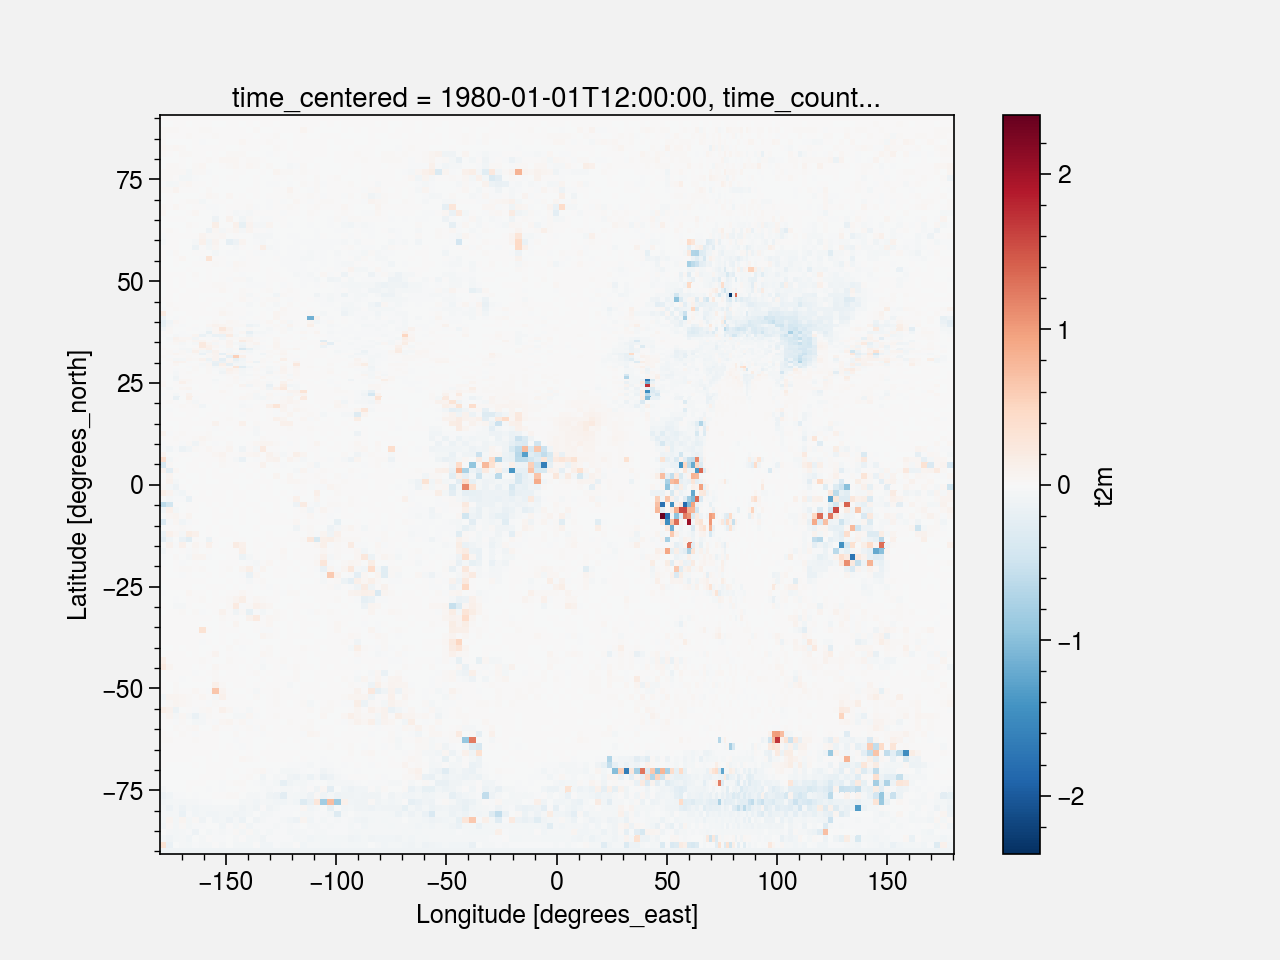

In [26]:
((ds.t2m[0]-273.15) - temp_without_forcing).plot()

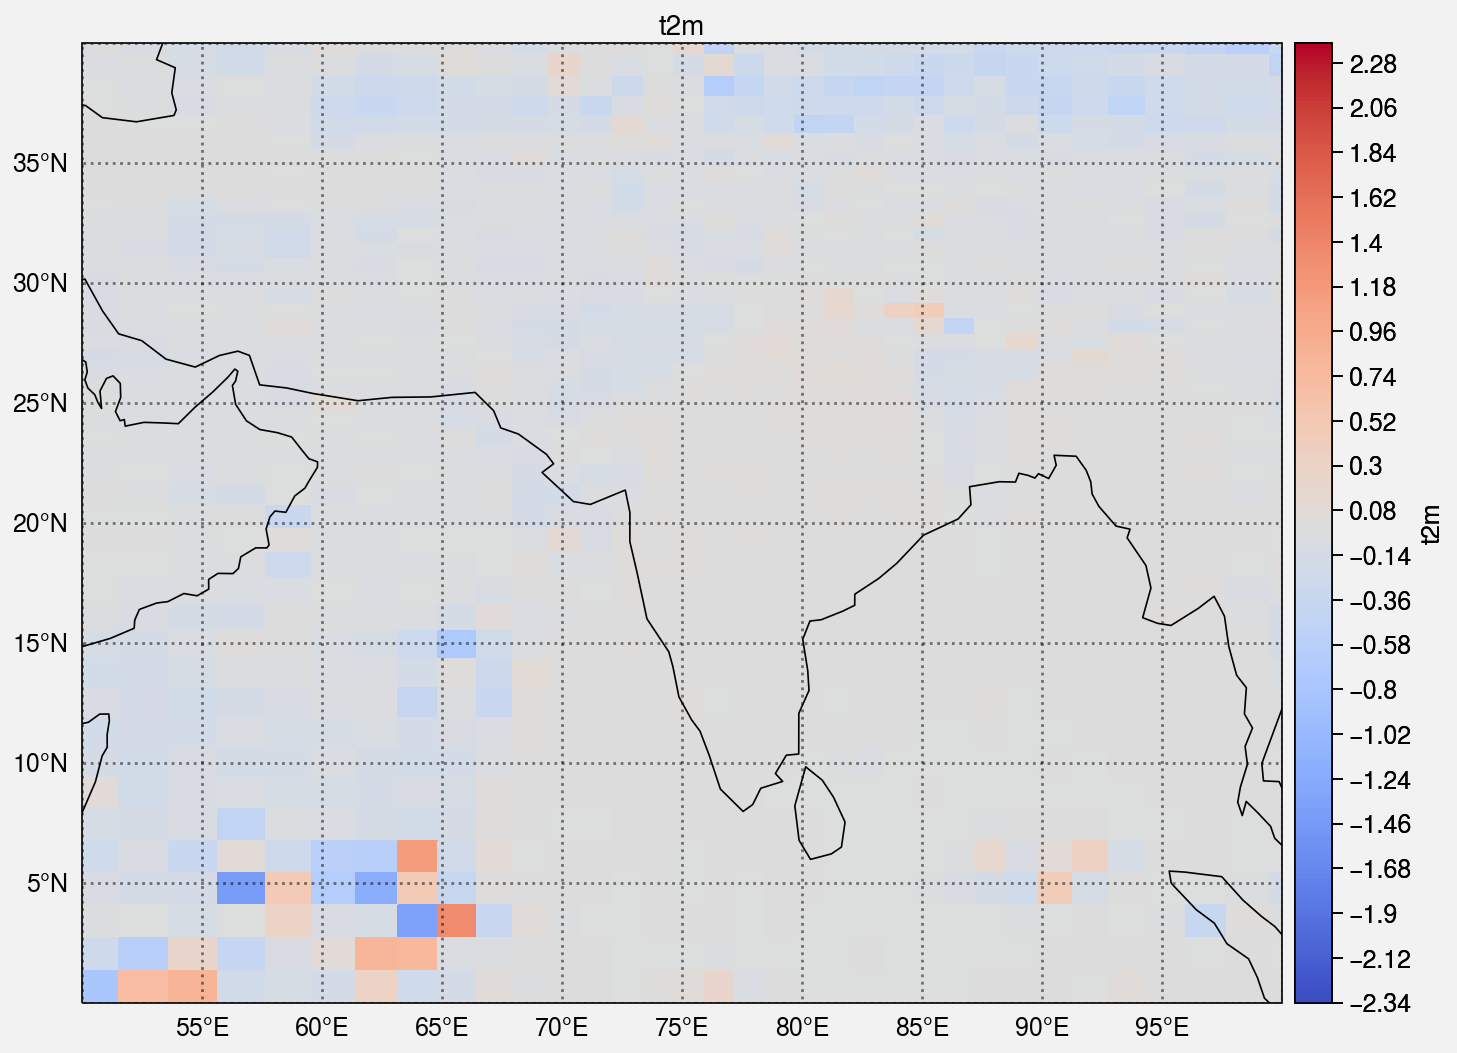

In [23]:
f, axs = plot.subplots(proj='cyl', axwidth=6)

axs.format(coast=True, labels=True, lonlim=(50,100), latlim=(0,40), lonlines=5, latlines=5)

axs.pcolormesh((ds.t2m[0]-273.15) - temp_without_forcing, cmap='coolwarm', norm='midpoint', colorbar='r', globe=True, levels=256)

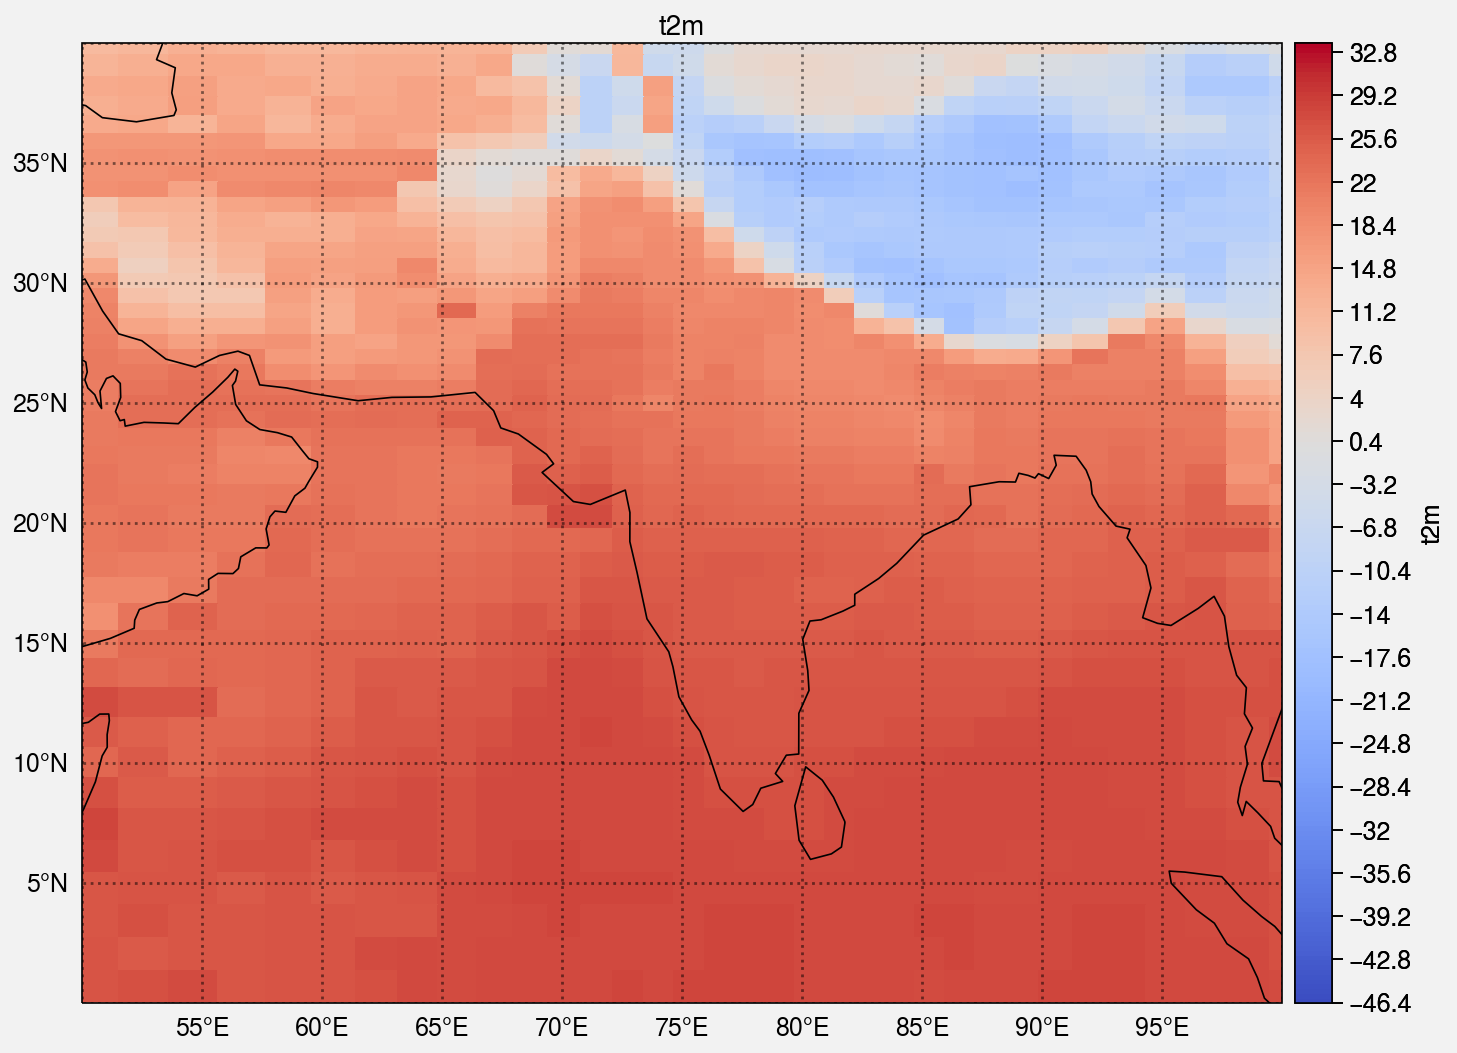

In [27]:
%matplotlib inline
f, axs = plot.subplots(proj='cyl', axwidth=6)

axs.format(coast=True, labels=True, lonlim=(50,100), latlim=(0,40), lonlines=5, latlines=5)

axs.pcolormesh(ds.t2m[0]-273.15, cmap='coolwarm', norm='midpoint', colorbar='r', globe=True, levels=256)